In [1]:
import gpaw

[dstwosa:04586] mca_base_component_repository_open: unable to open mca_btl_openib: librdmacm.so.1: cannot open shared object file: No such file or directory (ignored)


In [2]:
from gpaw.mpi import rank, size

In [7]:
import ase.dft.bz as bz

In [14]:
from ase.dft.kpoints import *

In [15]:
monkhorst_pack((4, 1, 1))

array([[-0.375,  0.   ,  0.   ],
       [-0.125,  0.   ,  0.   ],
       [ 0.125,  0.   ,  0.   ],
       [ 0.375,  0.   ,  0.   ]])

In [13]:
from ase.io import vasp
ben4=vasp.read_vasp('POSCAR')

In [23]:
lat=ben4.cell.get_bravais_lattice()

In [20]:
ben4.pbc=[ True,  True,  False]

In [21]:
ben4.pbc

array([ True,  True, False])

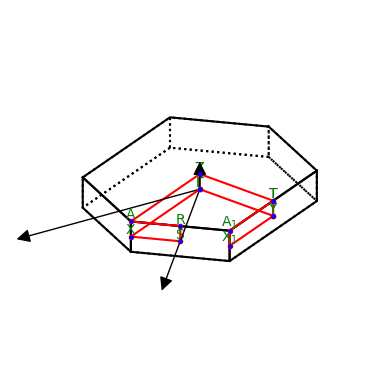

<Axes3D: >

In [24]:
lat.plot_bz(show=True)

In [27]:
path=ben4.cell.bandpath('GXSX1YG', npoints=200)

In [33]:
lat.get_special_points()

{'G': array([0., 0., 0.]),
 'A': array([0.30616807, 0.30616807, 0.5       ]),
 'A1': array([-0.30616807,  0.69383193,  0.5       ]),
 'R': array([0. , 0.5, 0.5]),
 'S': array([0. , 0.5, 0. ]),
 'T': array([-0.5,  0.5,  0.5]),
 'X': array([0.30616807, 0.30616807, 0.        ]),
 'X1': array([-0.30616807,  0.69383193,  0.        ]),
 'Y': array([-0.5,  0.5,  0. ]),
 'Z': array([0. , 0. , 0.5])}

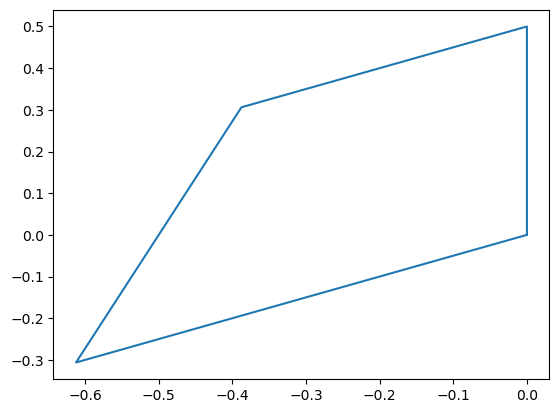

In [31]:
import matplotlib.pyplot as plt
x=path.kpts[:,0]
y=path.kpts[:,1]
plt.plot(x,y)

In [5]:
import ase.dft.kpoints

In [6]:
ase.dft.kpoints

Type:        module
String form: <module 'ase.dft.kpoints' from '/home/dst-wosa/.conda/envs/gpaw/lib/python3.11/site-packages/ase/dft/kpoints.py'>
File:        ~/.conda/envs/gpaw/lib/python3.11/site-packages/ase/dft/kpoints.py
Docstring:   <no docstring>

In [ ]:
6069.57619045

In [39]:
#visualizing atom
from ase.visualize import view
ben4_sc=ben4.repeat((3,3,1))
view(ben4_sc)

<Popen: returncode: None args: ['/home/dst-wosa/.conda/envs/gpaw/bin/python'...>

In [40]:
path=ben4.cell.bandpath('GXSX1YG', npoints=200)

In [45]:
import sys
import numpy as np
from ase import Atoms
from ase.build import niggli_reduce
from gpaw import GPAW, FermiDirac

# Script to get the total energies of a supercell
# of BN with and without a carbon substitution

c = 15.0

N = 3#int(sys.argv[1])  # NxNx1 supercell
h = 0.15

a = 2.51026699
cell = [[a, 0., 0.],
        [-a / 2, np.sqrt(3) / 2 * a, 0.],
        [0., 0., c]]
scaled_positions = [[2. / 3, 1. / 3, 0.5],
                    [1. / 3, 2. / 3, 0.5]]

system = Atoms('BN',
               cell=cell,
               scaled_positions=scaled_positions,
               pbc=[1, 1, 1])
system = system.repeat((2, 1, 1))
niggli_reduce(system)

defect = system.repeat((N, N, 1))
#defect[0].symbol = 'C'
#defect[1].magmom = 1


In [46]:
view(defect)

<Popen: returncode: None args: ['/home/dst-wosa/.conda/envs/gpaw/bin/python'...>